In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

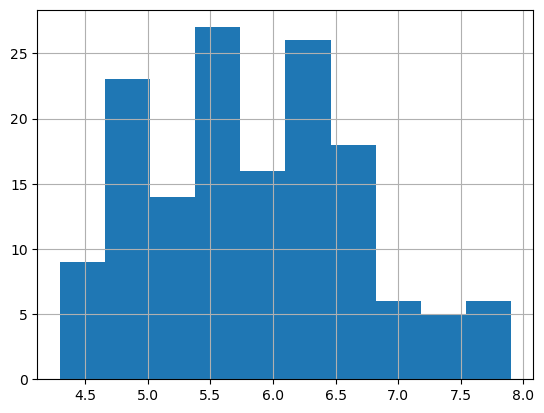

In [7]:
df['sepal_length'].hist()

<Axes: >

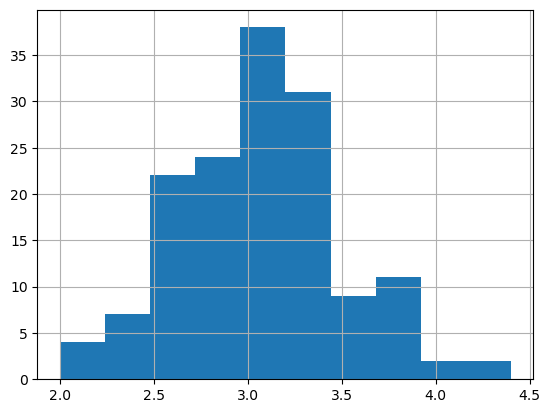

In [8]:
df['sepal_width'].hist()

<Axes: >

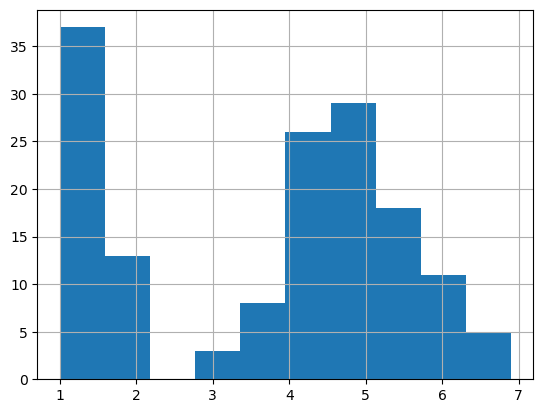

In [9]:
df['petal_length'].hist()

<Axes: >

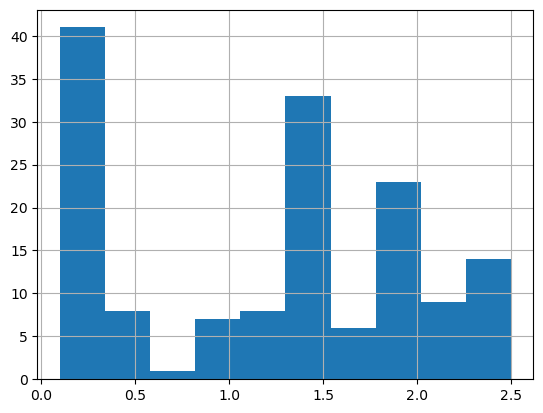

In [10]:
df['petal_width'].hist()

In [11]:
colors = ['green', 'yellow', 'blue']
Species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] 

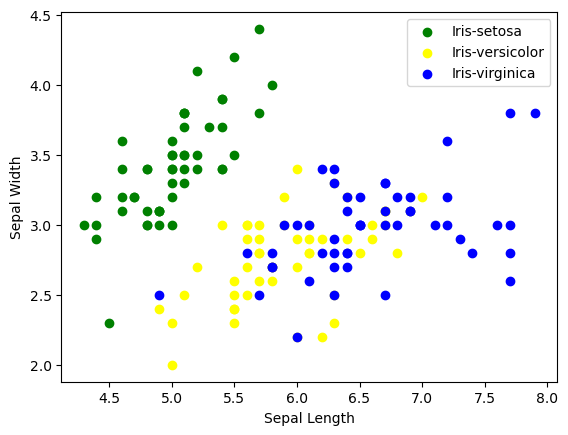

In [12]:
for i in range(3):
    x = df[df['species'] == Species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()


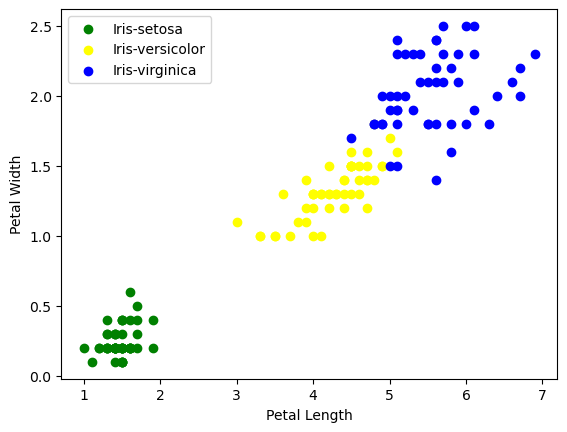

In [13]:
for i in range(3):
    x = df[df['species'] == Species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=Species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()


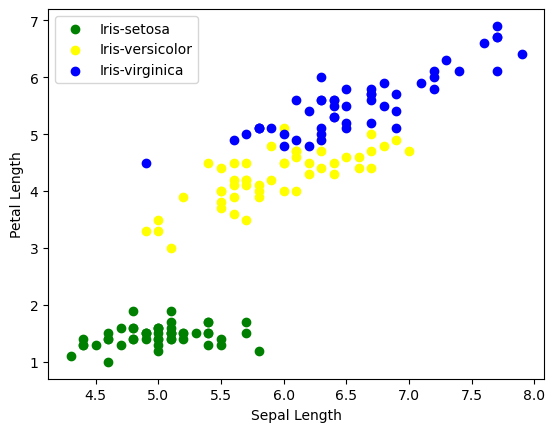

In [14]:
for i in range(3):
    x = df[df['species'] == Species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()


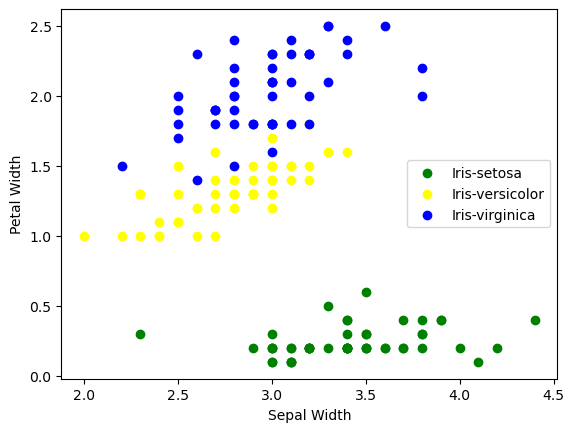

In [15]:
for i in range(3):
    x = df[df['species'] == Species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=Species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()


In [19]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


<Axes: >

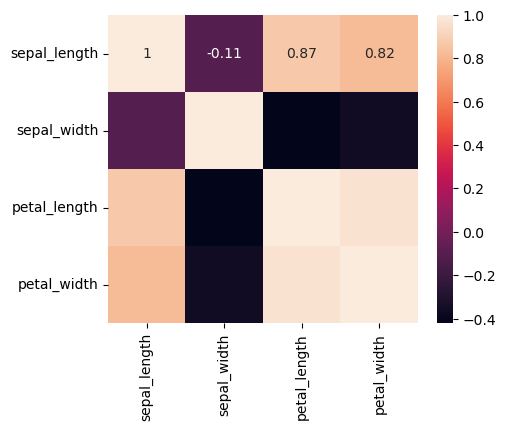

In [27]:
corr = df[numeric_columns].corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
from sklearn.model_selection import train_test_split
#train -70
#test -30
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [36]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[-0.37365793  0.87324851 -2.28483474 -1.00273287]
 [ 0.34204166 -0.20153031 -0.14605021 -0.72899606]
 [ 0.03161627 -0.6717182   2.43088495  1.73172893]]
Intercept: [  8.81558298   2.21327375 -11.02885673]


In [39]:
print("Accuracy:" ,model.score(x_test, y_test) * 100)

Accuracy: 100.0
